In [2]:
*| echo: true
*| code-fold: true

qui: {
  clear
set scheme white2
color_style bay
qui:set obs 101
gen r = runiform(0,2*_pi)

gen y = 0 
gen x = 0
replace y = y[_n-1] + sin(r) if _n>1
replace x = x[_n-1] + cos(r) if _n>1
gen n = _n
}

*scatter  y x , connect(l) name(m1, replace) 
*line y x n, name(m2, replace) 

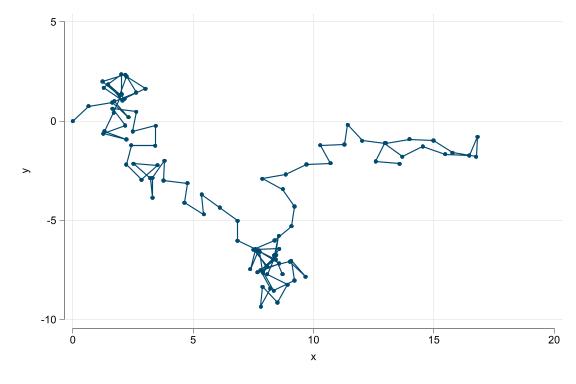

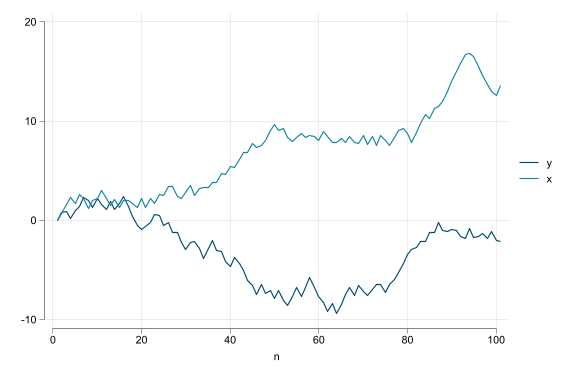

In [3]:
*| echo: false
*| code-fold: true
*| layout-ncol: 2

scatter  y x , connect(l) name(m1, replace) 
line y x n, name(m2, replace) 

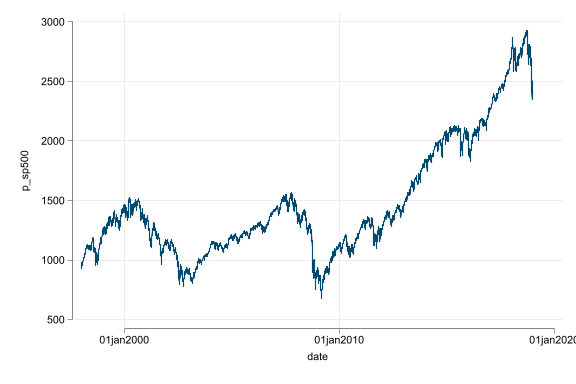

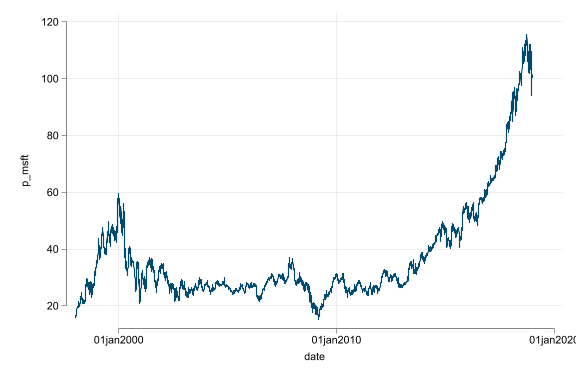

In [4]:
*| echo: true
*| code-fold: true
*| fig-align: center
*| layout-ncol: 2
qui {
use "data_slides/stock-prices-daily.dta", clear
ren *, low
}
line p_sp500 date, name(m1, replace)
line p_msft date, name(m2, replace)

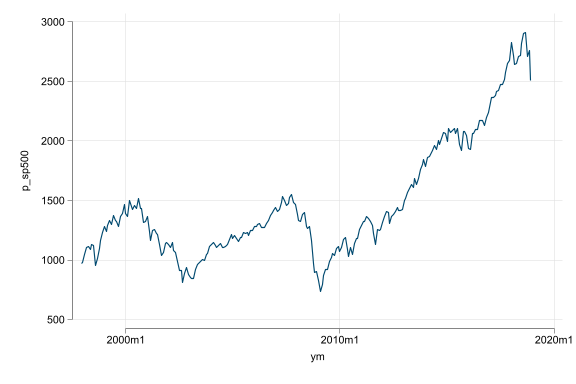

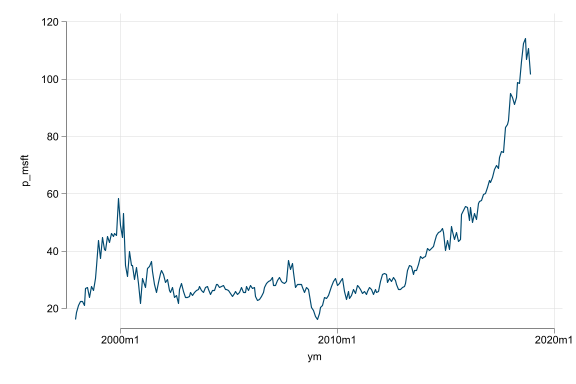

In [5]:
*| echo: true
*| code-fold: true
*| fig-align: center
*| layout-ncol: 2
qui {
use "data_slides/stock-prices-daily.dta", clear
ren *, low
sort ym date
bysort ym: gen flag = _n == _N
keep if flag==1
}
line p_sp500 ym, name(m1, replace)
line p_msft ym, name(m2, replace)

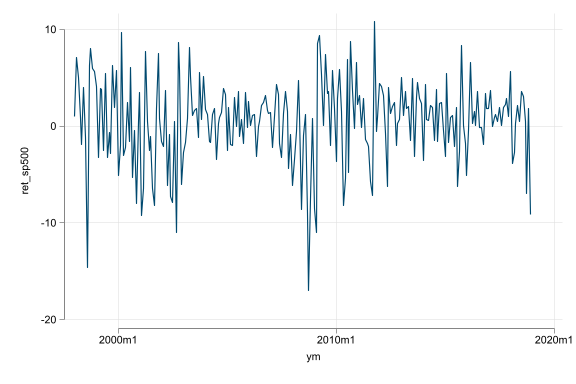

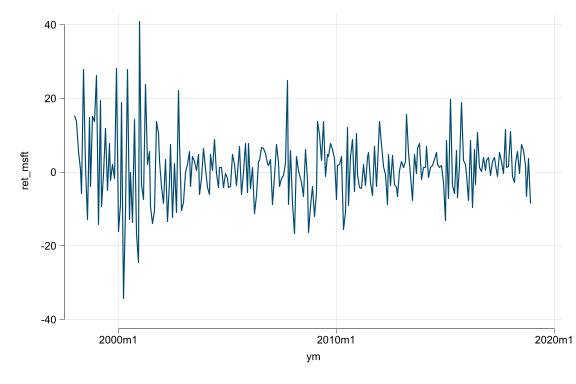

In [6]:
*| echo: true
*| code-fold: true
*| fig-align: center
*| layout-ncol: 2
qui: {
use "data_slides/stock-prices-daily.dta", clear
ren *, low
sort ym date
bysort ym: gen flag = _n == _N
keep if flag==1
tsset ym
gen ret_sp500 = 100 * (p_sp500 - p_sp500[_n-1]) / p_sp500[_n-1]
gen ret_msft = 100 * (p_msft - p_msft[_n-1]) / p_msft[_n-1]
}

line ret_sp500 ym, name(m1, replace)
line ret_msft ym, name(m2, replace)

In [7]:
*| echo: true
*| code-fold: true
*| fig-align: center

pperron ret_sp500
pperron ret_msft


Phillips–Perron test for unit root       Number of obs   = 251
Variable: ret_sp500                      Newey–West lags =   4

H0: Random walk without drift, d = 0

                                       Dickey–Fuller
                   Test      -------- critical value ---------
              statistic           1%           5%          10%
--------------------------------------------------------------
 Z(rho)        -230.845      -20.301      -14.000      -11.200
 Z(t)           -14.365       -3.460       -2.880       -2.570
--------------------------------------------------------------
MacKinnon approximate p-value for Z(t) = 0.0000.



Phillips–Perron test for unit root       Number of obs   = 251
Variable: ret_msft                       Newey–West lags =   4

H0: Random walk without drift, d = 0

                                       Dickey–Fuller
                   Test      -------- critical value ---------
              statistic           1%           5%          10%
--------------------------------------------------------------
 Z(rho)        -284.851      -20.301      -14.000      -11.200
 Z(t)           -19.346       -3.460       -2.880       -2.570
--------------------------------------------------------------
MacKinnon approximate p-value for Z(t) = 0.0000.
